In [4]:
import numpy as np
import sympy as sp
from sympy import init_printing
from sympy import Matrix
from sympy.interactive import printing
printing.init_printing(use_latex=True)
sin=np.sin
cos=np.cos
pi=np.pi

In [2]:
spi=sp.pi
ssin=sp.sin
scos=sp.cos

In [52]:
#Funciones de rotación canonicas con valores simbolicos
def srotx(ang):
    Rx=sp.Matrix([[1,0,0],
                  [0,sp.cos(ang),-sp.sin(ang)],
                  [0, sp.sin(ang), sp.cos(ang)]])
    return Rx
def sroty(ang):
    Ry= sp.Matrix([[sp.cos(ang),0,sp.sin(ang)],
                  [0,1,0],
                  [-sp.sin(ang), 0, sp.cos(ang)]])
    return Ry
def srotz(ang):
    Rz= sp.Matrix([[sp.cos(ang),-sp.sin(ang),0],
                  [sp.sin(ang), sp.cos(ang), 0],
                  [0,0,1]])
    return Rz


def rotdh(d,th,a,alf):
    T=sp.Matrix([[scos(th),-scos(alf)*ssin(th),ssin(alf)*ssin(th),a*scos(th)],
                  [ssin(th),scos(alf)*scos(th),-ssin(alf)*scos(th),a*ssin(th)],
                  [0, ssin(alf), scos(alf),d],[0, 0, 0, 1]])
    return T


def R_rpy(R,s):


    if R[2,0] == 0:
        if s == '+':
            fi_p = sp.atan2(R[2,0],sp.sqrt(R[2,1]**2+R[2,2]**2))
        elif s == '-':
            fi_p = sp.atan2(R[2,0],-sp.sqrt(R[2,1]**2+R[2,2]**2))
    else: 
        if s == '+':
            fi_p = sp.atan2(-R[2,0],sp.sqrt(R[2,1]**2+R[2,2]**2))
        elif s == '-':
            fi_p = sp.atan2(-R[2,0],-sp.sqrt(R[2,1]**2+R[2,2]**2))

    if sp.cos(fi_p) != 0:
        fi_r = sp.atan2(R[1,0]/sp.cos(fi_p),R[0,0]/sp.cos(fi_p))
        fi_y = sp.atan2(R[2,1]/sp.cos(fi_p),R[2,2]/sp.cos(fi_p))
        return fi_r, fi_p, fi_y

In [36]:
q1, q2, q3, q4, q5 = sp.symbols("q1 q2 q3 q4 q5")
l2=0.4
l3=0.3
T01=rotdh(0,q1,-0,0)
T12=rotdh(q2,0,0,spi/2)

T23=rotdh(0,q3,l2,0)
T34=rotdh(0,spi-q4,-l3,spi/2)
T4F=rotdh(q5,-spi/2,0,0)

T0F=sp.simplify(T01*T12*T23*T34*T4F)


In [65]:
T0F.subs({q1:0, q2:0, q3:0, q4:0, q5:0})


⎡0  -1  0  0.7⎤
⎢             ⎥
⎢1  0   0   0 ⎥
⎢             ⎥
⎢0  0   1   0 ⎥
⎢             ⎥
⎣0  0   0   1 ⎦

Jacobiano Geometrico: 


⎡(1.0⋅q₅⋅sin(q₃ - q₄) - 0.4⋅cos(q₃) - 0.3⋅cos(q₃ - q₄))⋅sin(q₁)   (1.0⋅q₅⋅sin(
⎢                                                                             
⎢(-1.0⋅q₅⋅sin(q₃ - q₄) + 0.4⋅cos(q₃) + 0.3⋅cos(q₃ - q₄))⋅cos(q₁)  (-1.0⋅q₅⋅sin
⎢                                                                             
⎢                               0                                             
⎢                                                                             
⎢                               0                                             
⎢                                                                             
⎢                               0                                             
⎢                                                                             
⎣                               1                                             

q₃ - q₄) - 0.4⋅cos(q₃) - 0.3⋅cos(q₃ - q₄))⋅sin(q₁)   -(1.0⋅q₅⋅cos(q₃ - q₄) + 0
                                                   

La posicion y orientación en el instante 5 es


⎡-1   0     0         0      ⎤
⎢                            ⎥
⎢    -√3                     ⎥
⎢0   ────  1/2  0.1 + 0.35⋅√3⎥
⎢     2                      ⎥
⎢                            ⎥
⎢          √3                ⎥
⎢0   1/2   ──   0.1⋅√3 + 0.25⎥
⎢          2                 ⎥
⎢                            ⎥
⎣0    0     0         1      ⎦

La velocidad y razon de cambio en el instante 5 es


⎡-0.35⋅√3 - 0.1  -0.35⋅√3 - 0.1        0               0          0 ⎤
⎢                                                                   ⎥
⎢      0               0         -0.1⋅√3 - 0.05  -0.1⋅√3 + 0.15   0 ⎥
⎢                                                                   ⎥
⎢      0               0         0.1 + 0.35⋅√3   0.1 + 0.15⋅√3    0 ⎥
⎢                                                                   ⎥
⎢      0               0               1               1          0 ⎥
⎢                                                                   ⎥
⎢      0               0               0               0         1/2⎥
⎢                                                                   ⎥
⎢                                                                √3 ⎥
⎢      1               1               0               0         ── ⎥
⎣                                                                2  ⎦

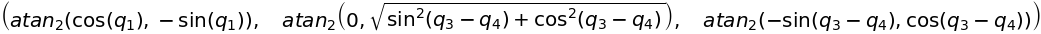

In [53]:
T02=T01*T12
T03=T01*T12*T23
T04=T01*T12*T23*T34


p1=T01[0:3, 3]
z1= T01[0:3, 2]
p2=T02[0:3, 3]
z2=T02[0:3, 2]
p3=T03[0:3, 3]
z3=T03[0:3, 2]
p4=T04[0:3, 3]
z4=T04[0:3, 2]
p5=T0F[0:3, 3]
z5=T0F[0:3, 2]

z0 = sp.Matrix([[0],[0],[1]]);
p0 = sp.Matrix([[0],[0],[0]]);
Jv1 = sp.simplify(z0.cross(p5-p0)); 
Jv2 = sp.simplify(z1.cross(p5-p1)); 
Jv3 = sp.simplify(z2.cross(p5-p2)); 
Jv4 = sp.simplify(z3.cross(p5-p3)); 
Jv5 = sp.simplify(z4.cross(p5-p4)); 
Jv6 = sp.simplify(z5.cross(p5-p5)); 
Jw1=z0
Jw2=z1
Jw3=z2
Jw4=z3
Jw5=z4


J1 = sp.Matrix.vstack(Jv1, Jw1)
J2 = sp.Matrix.vstack(Jv2, Jw2)
J3 = sp.Matrix.vstack(Jv3, Jw3)
J4 = sp.Matrix.vstack(Jv4, Jw4)
J5 = sp.Matrix.vstack(Jv5, Jw5)
J = sp.Matrix.hstack(J1, J2, J3,J4,J5)

print('Jacobiano Geometrico: '), display(J)


# Para t=5s

#Posicion y orientacion

T0Fp=T0F.subs({q1:spi/2, q2:0.2, q3:spi/6, q4:spi/3, q5:0.2})

print('La posicion y orientación en el instante 5 es'); display(T0Fp)

#Velocidades y orientaciones

J_5v=J.subs({q1:spi/2,q2:0.2,q3:spi/6,q4:spi/3,q5:0.2})
print('La velocidad y razon de cambio en el instante 5 es'); display(J_5v)


#En roll pitch yaw


Rrpy=R_rpy(T0F[:3,0:3],'+')
Rrpy






Primero tendriamos expresar la posición a alcanzar por el efector final respecto al sistema del robot movil respecto a la base, para lo que tendriamos que multiplicar las coordenadas por la matriz de transformación de la base al efector final, lo cual solo cambiaria en posición. La nueva posición seria (5-1,4-1,1-1). Luego procederiamos a calcular la cinematica inversa para calcular los angulos que necesitamos alcanzar usando algun metodo como newton raphson. Si lo que queremos son las velocidades y tasas de cambio, lo que podiamos hacer es multiplicar (R_B_R 0; 0 RB_0 )*J_sistemarobotmovil, lo cual nos daria el Jacobiano geometrico respecto al sistema inercial

In [79]:
#Pregunta 2

#Parte a

q1,q2,q3,m1,m2,l1,l2=sp.symbols('q1 q2 q3 m1 m2 l1 l2')


R11=srotz(q1)
R12=0
R13=srotz(q1)*sroty(q3)
# Posiciones de los centros de masa
x1=0
y1=0

x2=0
y2=0

x3=l2*sp.cos(q3)
y3=0

z1=0
z2=q2-l1
z3=q2+l2*sp.sin(q3)


# Jacobianos de velocidad lineal (del CdM)
xyz1=sp.Matrix([[x1],[y1],[z1]])
xyz2=sp.Matrix([[x2],[y2],[z2]])
xyz3=sp.Matrix([[x3],[y3],[z3]])

Jv11=sp.diff(xyz1,q1)
Jv12=sp.diff(xyz1,q2)
Jv13=sp.diff(xyz1,q3)
Jv1=sp.Matrix.hstack(Jv11,Jv12,Jv13)
Jv1

Jv21=sp.diff(xyz2,q1)
Jv22=sp.diff(xyz2,q2)
Jv23=sp.diff(xyz2,q3)
Jv2=sp.Matrix.hstack(Jv21,Jv22,Jv23)
Jv2

Jv31=sp.diff(xyz3,q1)
Jv32=sp.diff(xyz3,q2)
Jv33=sp.diff(xyz3,q3)
Jv3=sp.Matrix.hstack(Jv21,Jv22,Jv33)
Jv3

#Jacobianos de velocidad angular
J1w=sp.Matrix([[0, 0,0],[0,0,0],[1,0,0]])
J2w=sp.Matrix([[0, 0,0],[0,0,0],[1,0,0]])
J3w=sp.Matrix([[0, 0,0],[0,0,1],[1,0,0]])

#Productos de Jacobianos de velocidad lineal
J1j1=sp.simplify(Jv1.T*Jv1)
J2j2=sp.simplify(Jv2.T*Jv2)
J3j3=sp.simplify(Jv3.T*Jv3)

#Productos de Jacobianos de velocidad angular con R
Jw1R1=J1w.T*R11
Jw2R2=J2w.T*R12
Jw3R3=J3w.T*R13

#Productos con el tensor de inercia de cada CdM
Ixx1, Ixy1, Ixz1, Ixy1, Iyy1, Iyz1, Ixz1, Iyz1, Izz1 = sp.symbols('Ixx1 Ixy1 Ixz1 Ixy1 Iyy1 Iyz1 Ixz1 Iyz1 Izz1')
Ixx2, Ixy2, Ixz2, Ixy2, Iyy2, Iyz2, Ixz2, Iyz2, Izz2 = sp.symbols('Ixx2 Ixy2 Ixz2 Ixy2 Iyy2 Iyz2 Ixz2 Iyz2 Izz2')

I1=sp.Matrix([[Ixx1, Ixy1, Ixz1],
             [Ixy1, Iyy1, Iyz1],
             [Ixz1, Iyz1, Izz1]])
I2=sp.Matrix([[Ixx2, Ixy2, Ixz2],
             [Ixy2, Iyy2, Iyz2],
             [Ixz2, Iyz2, Izz2]])


Icdm1=0
Icdm2=Jw2R2*I1*Jw2R2.T
Icdm3=Jw3R3*I2*Jw3R3.T

Icdm2, Icdm3

Mq=m1*J2j2+m2*J3j3+Icdm2+Icdm3

Mq

print(Mq)

Matrix([[-(-Ixx2*sin(q3) + Ixz2*cos(q3))*sin(q3) + (-Ixz2*sin(q3) + Izz2*cos(q3))*cos(q3), 0, (-Ixx2*sin(q3) + Ixz2*cos(q3))*sin(q1)*cos(q3) + (-Ixy2*sin(q3) + Iyz2*cos(q3))*cos(q1) + (-Ixz2*sin(q3) + Izz2*cos(q3))*sin(q1)*sin(q3)], [0, m1 + m2, l2*m2*cos(q3)], [-(Ixx2*sin(q1)*cos(q3) + Ixy2*cos(q1) + Ixz2*sin(q1)*sin(q3))*sin(q3) + (Ixz2*sin(q1)*cos(q3) + Iyz2*cos(q1) + Izz2*sin(q1)*sin(q3))*cos(q3), l2*m2*cos(q3), l2**2*m2 + (Ixx2*sin(q1)*cos(q3) + Ixy2*cos(q1) + Ixz2*sin(q1)*sin(q3))*sin(q1)*cos(q3) + (Ixy2*sin(q1)*cos(q3) + Iyy2*cos(q1) + Iyz2*sin(q1)*sin(q3))*cos(q1) + (Ixz2*sin(q1)*cos(q3) + Iyz2*cos(q1) + Izz2*sin(q1)*sin(q3))*sin(q1)*sin(q3)]])


In [80]:
#Parte b

#Matriz de coriolis 



#Calculo de Matriz Coriolisis/ fuerzas centrifugas
dq1, dq2,g=sp.symbols('\dot{q}_1 \dot{q}_2,g')

#Cij=sum cijk*qk (k=1 --> k=2)
#Cijk=1/2(dmij/dqk + dmik/dqj - dmjk/dqi)
q=sp.Matrix([q1,q2])

# Reemplazando los terminos
#c1111
mij11=sp.diff(Mq[0,0],q1) #mij
mik11=sp.diff(Mq[0,0],q1) #mik
mjk11=sp.diff(Mq[0,0],q1) #mjk
mwk11=sp.diff(Mq[0,0],q1)
c1111=(mij11+mik11-mjk11-mwk11)/2


#c2222

#c2222 Mq[i-1,j-1]
mij22=sp.diff(Mq[1,1],q2) #mij derivada respecto a k
mik22=sp.diff(Mq[1,1],q2) #mik derivada respecto a j
mjk22=sp.diff(Mq[1,1],q2) #mjk derivada respecto a i
mwk22=sp.diff(Mq[1,1],q2) #mwk derivada respecto a w
c2222=(mij22+mik22-mjk22-mwk22)/2


#c3333

#c3333 Mq[i-1,j-1]
mij33=sp.diff(Mq[1,1],q3) #mij derivada respecto a k
mik33=sp.diff(Mq[1,1],q3) #mik derivada respecto a j
mjk33=sp.diff(Mq[1,1],q3) #mjk derivada respecto a i
mwk33=sp.diff(Mq[1,1],q3) #mwk derivada respecto a w
c3333=(mij33+mik33-mjk33-mwk33)/2


c1111,c2222,c3333

In [77]:
#Pregunta 2

#Parte a

q1,q2,q3,m1,m2,l1,l2=sp.symbols('q1 q2 q3 m1 m2 l1 l2')


R11=srotz(q1)
R12=0
R13=srotz(q1)*sroty(q3)
# Posiciones de los centros de masa
x1=0
y1=0


x2=l2*sp.cos(q3)
y2=0

z1=q2-l1
z2=q2+l2*sp.sin(q3)



xyz1=sp.Matrix([[x1],[y1],[z1]])
xyz2=sp.Matrix([[x2],[y2],[z2]])

# Jacobianos de velocidad lineal (del CdM)
xyz1=sp.Matrix([[x1],[y1],[z1]])
xyz2=sp.Matrix([[x2],[y2],[z2]])
Jv11=sp.diff(xyz1,q1)
Jv12=sp.diff(xyz1,q2)
Jv1=sp.Matrix.hstack(Jv11,Jv12)
Jv1

Jv21=sp.diff(xyz2,q1)
Jv22=sp.diff(xyz2,q2)
Jv2=sp.Matrix.hstack(Jv21,Jv22)
Jv2

#Jacobianos de velocidad angular
J1w=sp.Matrix([[0, 0],[0,0],[1,0]])
J2w=sp.Matrix([[0, 0],[0,1],[1,0]])

#Productos de Jacobianos de velocidad lineal
J1j1=sp.simplify(Jv1.T*Jv1)
J2j2=sp.simplify(Jv2.T*Jv2)


#Productos de Jacobianos de velocidad angular con R

Jw1R1=J1w.T*R11
Jw2R2=J2w.T*R12

#Productos con el tensor de inercia de cada CdM
Ixx1, Ixy1, Ixz1, Ixy1, Iyy1, Iyz1, Ixz1, Iyz1, Izz1 = sp.symbols('Ixx1 Ixy1 Ixz1 Ixy1 Iyy1 Iyz1 Ixz1 Iyz1 Izz1')
Ixx2, Ixy2, Ixz2, Ixy2, Iyy2, Iyz2, Ixz2, Iyz2, Izz2 = sp.symbols('Ixx2 Ixy2 Ixz2 Ixy2 Iyy2 Iyz2 Ixz2 Iyz2 Izz2')

I1=sp.Matrix([[Ixx1, Ixy1, Ixz1],
             [Ixy1, Iyy1, Iyz1],
             [Ixz1, Iyz1, Izz1]])
I2=sp.Matrix([[Ixx2, Ixy2, Ixz2],
             [Ixy2, Iyy2, Iyz2],
             [Ixz2, Iyz2, Izz2]])

Icdm1=Jw1R1*I1*Jw1R1.T
Icdm2=Jw2R2*I2*Jw2R2.T
Icdm1, Icdm2

Mq=m1*J1j1+m2*J2j2+Icdm1+Icdm2
Mq


⎡Izz₁     0   ⎤
⎢             ⎥
⎣ 0    m₁ + m₂⎦